In [54]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [64]:
import os
import sys
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath(os.path.join(os.path.pardir, 'src')))

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # or any {'0', '1', '2'}
import tensorflow as tf
import absl.logging

absl.logging.set_verbosity(absl.logging.ERROR)

# Set memory growth
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

from jem import JointEmbeddingModel, get_data, convert_integers_to_explinations

lr = 0.001
epochs = 10
batch_size = 128
num_epochs = 10
input_state_embed = 64
hidden_state_embed = 32
output_state_embed = 16 
exp_embed = 32
output_exp_embed = 16

# Load the data
states, explinations, labels, vocab = get_data()

vocab_size = len(vocab)
max_sent_len = explinations.shape[1]

jem = JointEmbeddingModel(vocab_size=vocab_size, max_sent_len=max_sent_len, learning_rate=lr)

jem.fit(states, explinations, labels, batch_size=batch_size, epochs=epochs)

jem.save_model('../models/jem/joint_embedding_model.keras')

{'': 0, 'a': 1, 'generic': 2, 'move': 3, 'not': 4, 'tied': 5, 'to': 6, 'strategy': 7, 'creates': 8, 'an': 9, 'eye': 10, 'double': 11, 'provides': 12, 'center': 13, 'dominance': 14, 'gives': 15, 'area': 16, 'advantage': 17, 'leads': 18, 'win': 19}
[[1, 2, 3, 4, 5, 6, 1, 7], [8, 9, 10, 0, 0, 0, 0, 0], [8, 9, 11, 10, 0, 0, 0, 0], [12, 13, 14, 0, 0, 0, 0, 0], [15, 16, 17, 0, 0, 0, 0, 0], [18, 6, 1, 19, 0, 0, 0, 0]]
Model: "model_19"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_39 (InputLayer)          [(None, 5, 7, 7)]    0           []                               
                                                                                                  
 conv2d_38 (Conv2D)             (None, 5, 7, 4)      256         ['input_39[0][0]']               
                                                                        

2024-02-15 18:55:39.371586: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] model_pruner failed: INVALID_ARGUMENT: Graph does not contain terminal node AssignAddVariableOp_10.


1/1 [==============================] - 5s 5s/step - loss: 34.5267 - combined_output_loss: 34.5267
Epoch 2/10
1/1 [==============================] - 0s 93ms/step - loss: 16.4574 - combined_output_loss: 16.4574
Epoch 3/10
1/1 [==============================] - 0s 84ms/step - loss: 7.7396 - combined_output_loss: 7.7396
Epoch 4/10
1/1 [==============================] - 0s 82ms/step - loss: 4.7563 - combined_output_loss: 4.7563
Epoch 5/10
1/1 [==============================] - 0s 78ms/step - loss: 4.7677 - combined_output_loss: 4.7677
Epoch 6/10
1/1 [==============================] - 0s 75ms/step - loss: 5.5291 - combined_output_loss: 5.5291
Epoch 7/10
1/1 [==============================] - 0s 79ms/step - loss: 5.9705 - combined_output_loss: 5.9705
Epoch 8/10
1/1 [==============================] - 0s 82ms/step - loss: 5.8404 - combined_output_loss: 5.8404
Epoch 9/10
1/1 [==============================] - 0s 97ms/step - loss: 5.3316 - combined_output_loss: 5.3316
Epoch 10/10
1/1 [===========

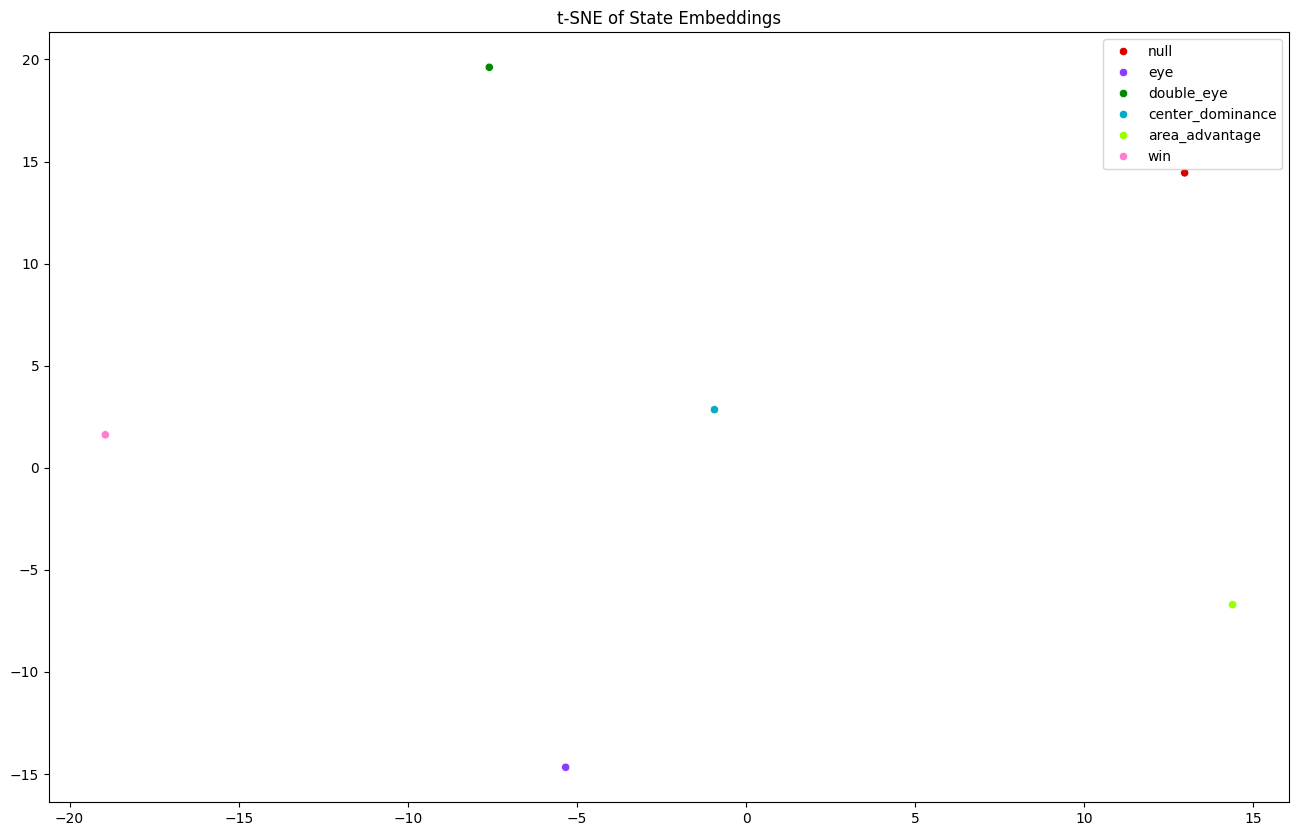

In [81]:
# Import necessary modules
from sklearn.manifold import TSNE
import seaborn as sns
import colorcet as cc

# Define necessary variables
state_embeddings = []
explination_predictions = []

# Get the embeddings
for i in range(len(states)):
    state_embed, exp_embed, _ = jem.predict(states[i], explinations[i])
    state_embeddings.append(state_embed)
    # Get the explination converted to a string
    explination = convert_integers_to_explinations(explinations[i], vocab)
    explination_predictions.append(explination)

new_state_embed = []

for list_ in state_embeddings:
    new_state_embed.append(list_[0])
    
new_state_embed = np.array(new_state_embed)
explination_predictions = np.array(explination_predictions)

# Fit the t-sne
tsne = TSNE(n_components=2, perplexity=5)
state_embed_tsne = tsne.fit_transform(new_state_embed)

# Plot the t-sne
palette = sns.color_palette(cc.glasbey, 6)
plt.figure(figsize=(16,10))
sns.scatterplot(x=state_embed_tsne[:,0], y=state_embed_tsne[:,1], hue=explination_predictions, legend='full', palette=palette)
plt.title('t-SNE of State Embeddings')
plt.plot()
plt.show()